# Opis: Program jest podzielony na sekcje:

## 1. funkcje.jl

zawarte są tu przydatne funkcje, z których korzystam w programie

1.1 myzip(xs : Array, ys : Array) : Array - dostaje parę list, zwraca listę par (do tworzenia z list xsów i yków listę, współrzędnych)

1.2 myunzip(xys : Array) : Array -> dostaje listę par, zwraca parę list (funkcja odwrotna do myzip)

## Splajn

2.1 makeSpline(coordinates: Array of Pair(x,y)) : Array of (sk(x), (xk,xk+1))
funkcja ta dostaje listę par współrzędnych i zwraca listę par: (wielomian 3 st., przedział za który odpowiada)

2.2 calculateSpline(splajn) -> zwraca 2 listy: wartości x-sów oraz f(x)-sów

2.3 circle(n, r=1) dla danej liczby punktów i promienia wyznacza błędy, koło oraz węzły interpolacyjne (równoodległe)

2.4 plotCircle(c, n) rysuje zadane koło (n liczba węzłów)

2.5 mainCircle( lista n-ów) - dla każdego n-a wyznacza koło oraz je rysuje

2.6 mainCircle(n) - dla danego d-a wyznacza koło oraz je rysuje

2.7 plotError, mainError, mainError analogiczne co ...Circle, tylko że rysowane są błędy 

2.8 kolejne 4 klatki to wyniki dla splajna

2.9 helix(n, p, r) - oblicza i rysuje helisę korzystając ze splajnów


## Bezier

3.1 B(t) -> (x(t),y(t))- funkcja Beziera

3.2 circle() - wyznacza błędy i koło za pomocą krzywych Beziera

3.3 kolejne 2 klatki to rysunek koła za pomocą Beziera i rysunek Błędów u Beziera


## Hermite

4.1 silnia -> wyznacza wartość silni

4.2 ilorazysilni(k) -> wyznacza listy ilorazów silni używanych do Xk, Yk

4.3 Hk, Xk, Yk -> pomocnicza, wyznaczająca xk, wyznaczająca yk

4.4 Hn, Xn, Yn -> pomocnicza, wyznaczająca xn, wyznaczająca yn

4.5 arc(n, α, r) -> wyznacza łuk z przedziału [α, -α], oraz błędy

4.6 circle(n, α, r) -> wyznacza koło, dla α = {pi, pi/2, pi/4}
plot(circle(...)[1]) -> błędy
plot(circle(...)[2]) -> koło
scatter(circle(...)[3] -> punkty interpolacji

4.7 kolejne 7 klatek to wykresy okręgów i błędów Hermite'a dla różnych parametrów

4.8 helix -> oblicza helisę

4.9 rysunek helisy z Hermite'a


In [7]:
using Polynomials
using Plots
include("funkcje.jl")
return

In [8]:
prec = 0.01
idealne = [(cos(t), sin(t)) for t in -pi:0.001:pi]
return

# Splajn

In [9]:
function makeSpline(coordinates)
    function CalculateCs()
        μ = [NaN64 for k in 1:n]
        α = vcat([0.], [3. * (A[k+1] - A[k])/h[k] - 3. * (A[k] - A[k-1])/h[k-1] for k in 2:n])

        C = [0. for k in 1:nPlus1]
        l = [0. for k in 1:nPlus1]
        z = [0. for k in 1:nPlus1]

        l[1] = 1.
        μ[1] = 0.
        z[1] = 0.

        for k in 2:n
            l[k] = 2 * (xs[k+1] - xs[k-1]) - h[k-1] * μ[k-1]
            μ[k] = h[k] / l[k]
            z[k] = (α[k] - h[k-1]*z[k-1]) / l[k]
        end

        l[nPlus1] = 1.
        z[nPlus1] = 0.
        C[nPlus1] = 0.

        for k in n:(-1):1
            C[k] = z[k] - μ[k]*C[k+1]
        end
        return C
    end
    nPlus1 = length(coordinates)
    n = nPlus1 - 1
    # x1 x2 ... xk+1
    xs = map(pair->pair[1], coordinates)
    # y1 y2 ... yk+1
    # ys = map(pair->pair[2], coordinates)
    A = map(pair->pair[2], coordinates)

    h = [xs[k+1] - xs[k] for k in 1:n]
    C = CalculateCs()

    B = [(A[k+1] - A[k]) / h[k] - h[k]*(C[k+1] + 2. * C[k]) / 3. for k in 1:n]
    D = [(C[k+1] - C[k]) / (3. * h[k]) for k in 1:n]

    outputSet = [Poly(NaN) for k in 1:n]
    intervals = myzip(xs,xs[2:end])

    for k in 1:n
        xk = xs[k]
        polynom = A[k] + B[k]*poly([xk]) + C[k]*(poly([xk])^2) + D[k]*(poly([xk]) ^ 3)
        outputSet[k] = polynom
    end
    return myzip(outputSet, intervals)
end

function calculateSpline(splajn)
#     prec = 0.01
    coors = []
    angles = []

    for i in 1:length(splajn)
        xk = splajn[i][2][1]
        xkPlus1 = splajn[i][2][2]
        wielomian = splajn[i][1]
        przedzial = [x for x in xk:prec:(xkPlus1-prec)]

        coors = vcat(coors, map(wielomian, przedzial))
        angles = vcat(angles, przedzial)
    end

    return angles, coors
end

calculateSpline (generic function with 1 method)

In [10]:
function circle(n, r = 1)   
    ps = [t for t in -pi:2*pi/n:pi]
    xs = r * cos.(ps)
    ys = r * sin.(ps)
    
    xspline = makeSpline(myzip(ps, xs))
    yspline = makeSpline(myzip(ps, ys))
    
    
    angles, xvalues = calculateSpline(xspline)
    angles, yvalues = calculateSpline(yspline) #jak zrobi się na odwrót kolejności to wychodzą ładne rysunki błędów
    
    xerrors = abs.(cos.(angles) - xvalues)
    yerrors = abs.(sin.(angles) - yvalues)
    
    errors = sqrt.([x^2 for x in xerrors] + [y^2 for y in yerrors])
    
    return [(angles, errors), (xvalues, yvalues), (xs, ys)]
end

function plotCircle(c, n)
    plot!(c[2], lab = "n = " * string(n), linestyle = :dash)
#     scatter!(c[3], lab = "Zadane punkty")
end

function mainCircle(ns :: Array{Int})
    
    Plots.plot(size = (600*1.1, 600))

    title!("Splajn")

    xlabel!("Os x")
    ylabel!("Os y")
    
    
    plot!(idealne, lab = "idealne kolo", color = :black)
    cns = [(circle(n), n) for n in ns]
    for cn in cns
        plotCircle(cn[1], cn[2])
    end
    
    savefig("splajn")
end
function mainCircle(n :: Int)
    
    Plots.plot(size = (600*1.1, 600))

    title!("Splajn")

    xlabel!("Os x")
    ylabel!("Os y")
    
    plot!(idealne, lab = "idealne kolo", color = :black)
    c = circle(n)
    plotCircle(c, n)
    
    savefig("splajn")
end


function plotError(c, n)
    plot!(c[1], lab = "n = " * string(n))
end
function mainError(ns :: Array{Int})
    Plots.plot(size = (600*1.1, 600))

    title!("Splajn Bledy")

    xlabel!("Os x")
    ylabel!("Os y")
    
    cns = [(circle(n), n) for n in ns]
    for cn in cns
        plotError(cn[1], cn[2])
    end
    
    savefig("splajnbledy")
end
function mainError(n :: Int)
    
    Plots.plot(size = (600*1.1, 600))

    title!("Splajn Blad")

    xlabel!("Os x")
    ylabel!("Os y")
    
    c = circle(n)
    plotError(c, n)
    
    savefig("splajnblad")
end   

mainError (generic function with 2 methods)

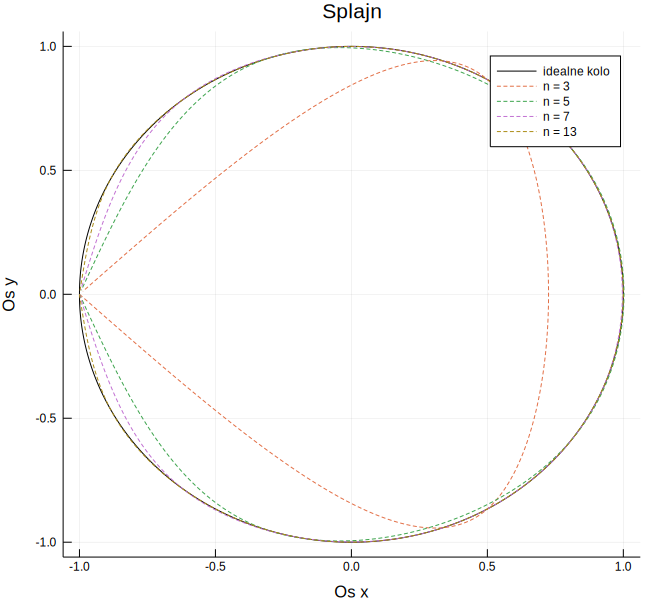

In [11]:
mainCircle([3,5,7,13])
plot!()

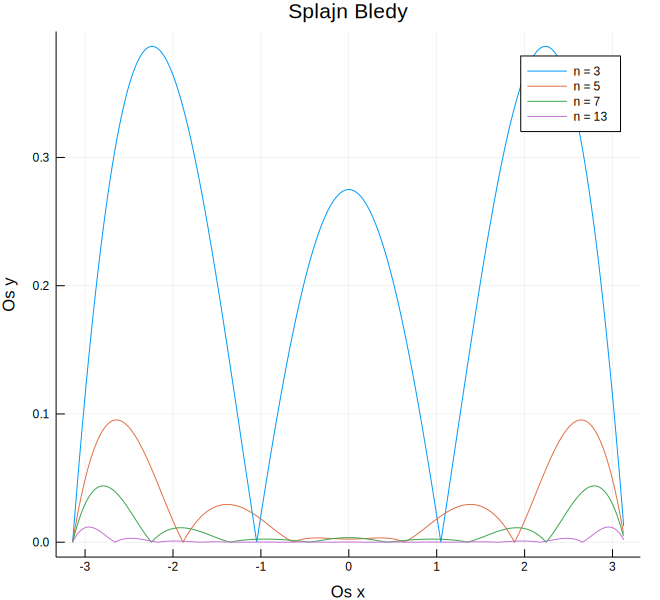

In [12]:
mainError([3,5,7,13])
plot!()

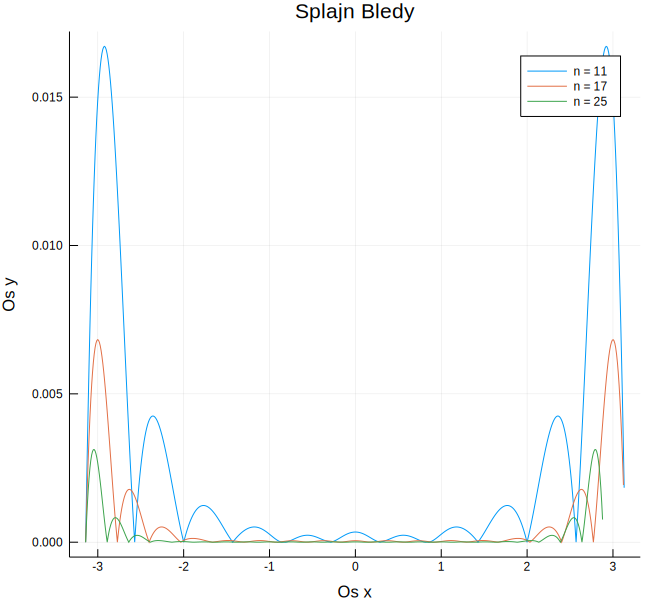

In [13]:
mainError([11, 17, 25])
plot!()

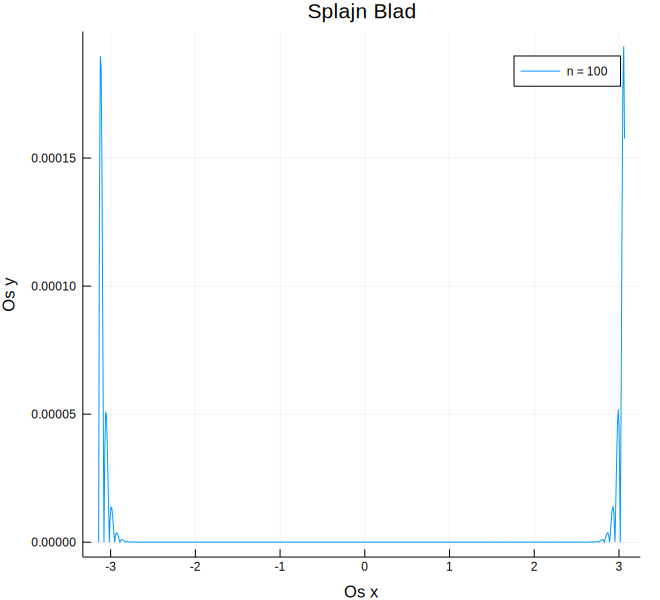

In [14]:
mainError(100)
plot!()

In [15]:
function helix(n, p, r = 1)    
    ps = [t for t in -pi:pi/n:pi]
    xs = r * cos.(ps)
    ys = r * sin.(ps)
    
    xspline = makeSpline(myzip(ps, xs))
    yspline = makeSpline(myzip(ps, ys))
    
    angles, xvalues = calculateSpline(xspline)
    angles, yvalues = calculateSpline(yspline)
    
    pts = [p*t for t in angles]
    
    Plots.plot(size = (600*1.1, 600), leg = false)
    plot!(pts, xvalues, yvalues)
    plot!(xvalues, pts, yvalues)
    plot!(xvalues, yvalues, pts)
    title!("Helisa Splajn")
    xlabel!("Os x")
    ylabel!("Os y")
end

helix (generic function with 2 methods)

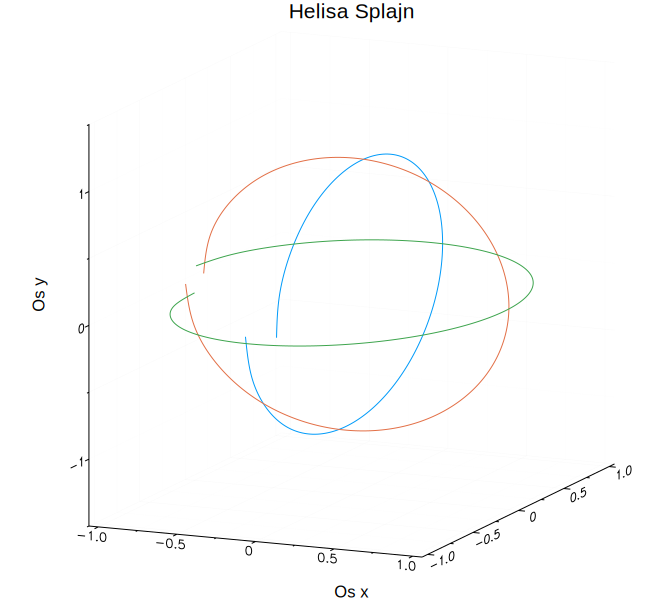

In [16]:
helix(10, pi/100)

# Bezier

In [17]:
function B(t)
    c = (4/3)*(sqrt(2) - 1)
    
    P0 = [0,1]
    P1 = [c,1]
    P2 = [1,c]
    P3 = [1,0]
    
    return (1-t)^3*P0 + 3*(1-t)^2*t*P1 + 3*(1-t)*t^2*P2 + t^3*P3
end

B (generic function with 1 method)

In [18]:
function circle()
    n = 1000
    prec = 1/n
    ts = [t for t in 0:prec:1]
    
    xvalues, yvalues = myunzip([B(t) for t in ts])
    
    angles = [t for t in 0:pi/(2*n+1):pi/2]
        
    xerrors = abs.(sin.(angles) - xvalues)
    yerrors = abs.(cos.(angles) - yvalues)
        
    errors = sqrt.([x^2 for x in xerrors] + [y^2 for y in yerrors])
    
    xvs = vcat(xvalues, yvalues, -xvalues, -yvalues) #cosinus
    yvs = vcat(-yvalues, xvalues, yvalues, -xvalues) #sinus
    
    xvalues = xvs
    yvalues = yvs
    
    return [(angles, errors), (xvalues, yvalues)]
end

circle (generic function with 3 methods)

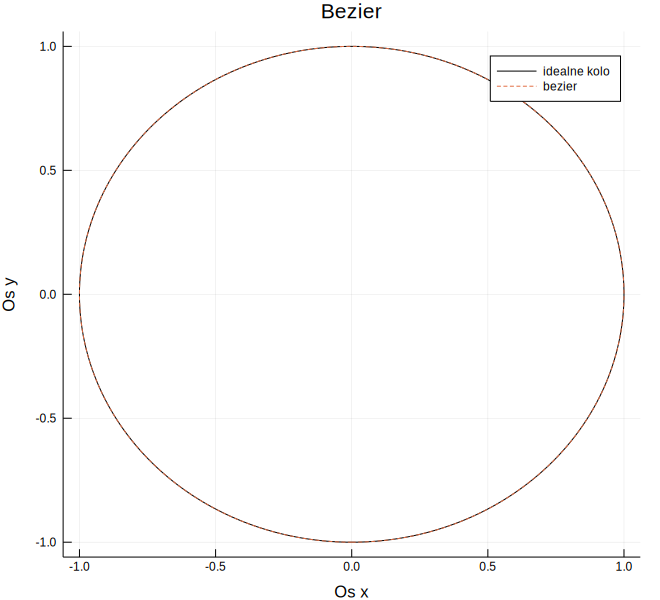

In [19]:
Plots.plot(size = (600*1.1, 600))
title!("Bezier")
xlabel!("Os x")
ylabel!("Os y")


plot!(idealne, lab = "idealne kolo", color = :black)
plot!(circle()[2], lab = "bezier", linestyle = :dash)

savefig("bezier")
plot!()

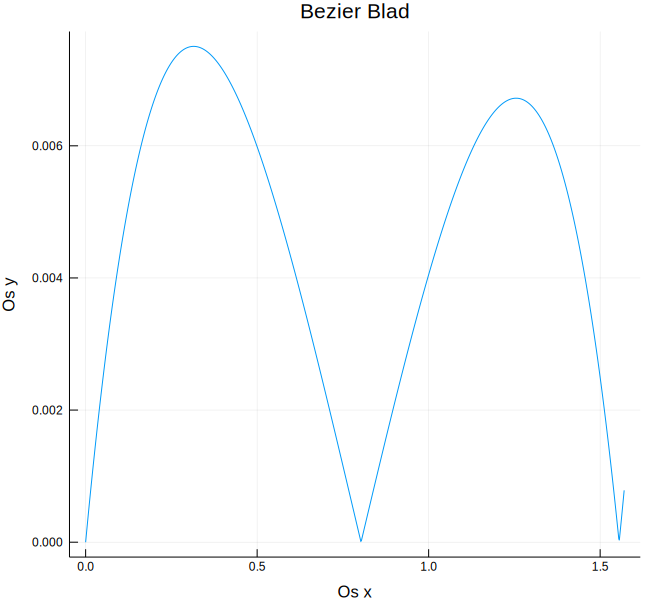

In [20]:
Plots.plot(size = (600*1.1, 600), leg = false)
title!("Bezier Blad")
xlabel!("Os x")
ylabel!("Os y")

plot!(circle()[1])

savefig("bezierblad")
plot!()

# Hermite

In [21]:
function silnia(k)::BigInt
    if k == 0
        return 1
    else
        return k * silnia(k-1)
    end
end

function ilorazysilni(k)::Tuple{Array{BigFloat,1}, Array{BigFloat,1}}
    xis = [BigFloat(1.) for i in 0:k]
    yis = [BigFloat(1.) for i in 0:k]
    xis[1] = yis[1] = BigFloat(1.)
    for j in 2:k
        i = j - 1
        xis[j] = BigFloat(xis[i] * BigFloat(k+i-1) * BigFloat(k - i) / BigFloat(i))
        yis[j] = xis[j] * (k+i) / (k-i)
    end
    yis[k+1] = yis[k] * 2
    return xis, yis
end

ilorazysilni (generic function with 1 method)

In [22]:
function Hk(k, α, facts, e, f)
    suma = .0
    for i in 0:e
        hi = f(pi*(k+i)/2 + α) / (2*α)^(k+i+1)
        fact = facts[i+1]
        suma += (hi*fact)
    end
    return suma / silnia(k)
end

function Xk(k, α)
    return Hk(k, α, ilorazysilni(k)[1], k-1, cos)
end
function Yk(k, α)
    return Hk(k, α, ilorazysilni(k)[2], k, sin)
end

Yk (generic function with 1 method)

In [23]:
function Hn(t, n, α, Hks, c1, c2)
    suma = .0
    c = t^2 - α^2
    for k in 1:n
        suma += Hks[k]*c^k
    end
    suma *= c1
    suma += c2
    return suma
end

function Xn(t, n, α, Xks)
    return Hn(t, n, α, Xks, 2*α, cos(α))
end
function Yn(t, n, α, Xks)
    return Hn(t, n, α, Xks, 2*t, t*sin(α)/α)
end
    

Yn (generic function with 1 method)

In [24]:
function arc(n, α, r)
    Xks = [Xk(k, α) for k in 1:n]
    Yks = [Yk(k, α) for k in 1:n]
    
    angles = [t for t in -α:prec:α]
    
    xvalues = r * [Xn(t, n, α, Xks) for t in angles]
    yvalues = r * [Yn(t, n, α, Yks) for t in angles] 
    
    xerrors = abs.(r * cos.(angles) - xvalues)
    yerrors = abs.(r * sin.(angles) - yvalues)
    
    angles = convert.(Float64, round.(angles; digits = 10))
    xvalues = convert.(Float64, round.(xvalues; digits = 10))
    yvalues = convert.(Float64, round.(yvalues; digits = 10))
    xerrors = convert.(Float64, round.(xerrors; digits = 10))
    yerrors = convert.(Float64, round.(yerrors; digits = 10))
    
    errors = sqrt.([x^2 for x in xerrors] + [y^2 for y in yerrors])
    
    return [(angles,errors), (xvalues, yvalues)]
end
function circle(n, α = pi, r = 1)
    a = arc(n, α, r)
    angles, errors = a[1]
    xvalues, yvalues = a[2]
    
    if α == pi
        xpoints = [cos(pi), cos(-pi)]
        ypoints = [sin(pi), sin(-pi)]
        return [(angles, errors), (xvalues, yvalues), (xpoints, ypoints)]
    end
    if α == pi/2
        xvalues = vcat(xvalues, reverse(-xvalues))
        yvalues = vcat(yvalues, reverse(yvalues))
        
        xpoints = [cos(pi/2), cos(-pi/2)]
        ypoints = [sin(pi/2), sin(-pi/2)]
        return [(angles, errors), (xvalues, yvalues), (xpoints, ypoints)]
    end
    if α == pi/4
        xvs = vcat(reverse(xvalues), reverse(yvalues), -xvalues, yvalues)
        yvs = vcat(reverse(yvalues), reverse(-xvalues), yvalues, xvalues)
        xvalues = xvs
        yvalues = yvs
        
        xpoints = [cos(pi/4), cos(3*pi/4), cos(5*pi/4), cos(7*pi/4)]
        ypoints = [sin(pi/4), sin(3*pi/4), sin(5*pi/4), sin(7*pi/4)]
        
        return [(angles, errors), (xvalues, yvalues), (xpoints, ypoints)]
    end
end

circle (generic function with 4 methods)

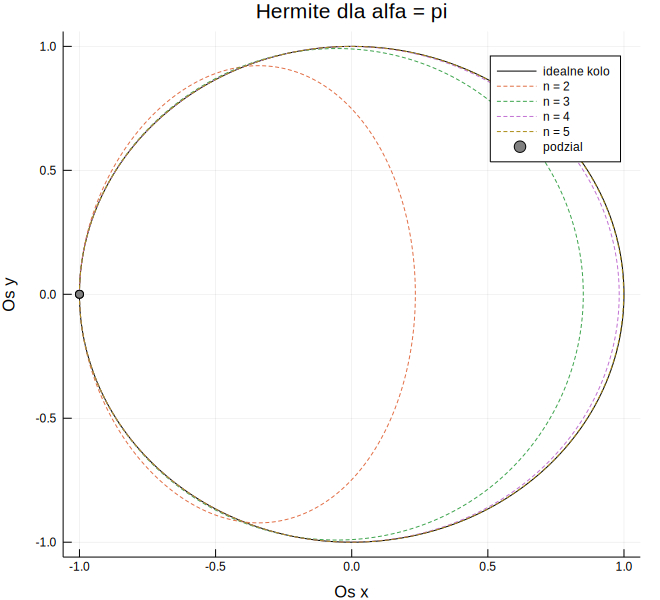

In [25]:
HPi = [circle(i, pi) for i in 1:5]

Plots.plot(size = (600*1.1, 600))

title!("Hermite dla alfa = pi")
xlabel!("Os x")
ylabel!("Os y")

plot!(idealne, lab = "idealne kolo", color = :black)
plot!(HPi[2][2], lab = "n = 2", linestyle = :dash)
plot!(HPi[3][2], lab = "n = 3", linestyle = :dash)
plot!(HPi[4][2], lab = "n = 4", linestyle = :dash)
plot!(HPi[5][2], lab = "n = 5", linestyle = :dash)

scatter!(HPi[2][3], lab = "podzial", color = :grey)

savefig("hermite")
plot!()

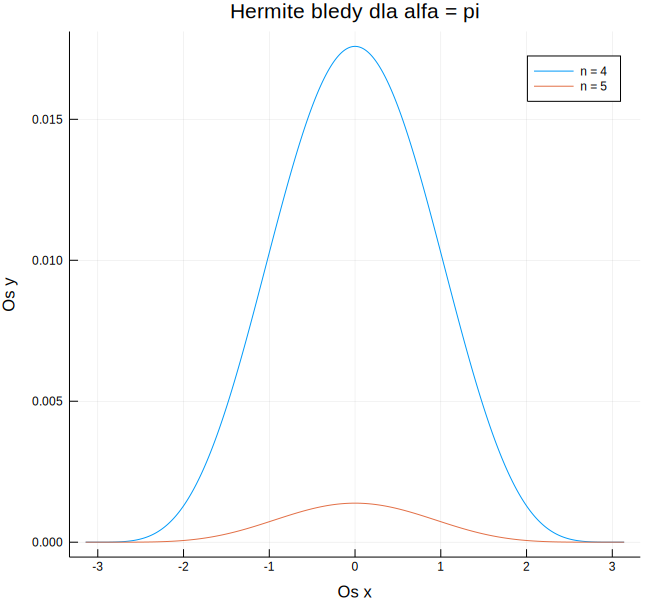

In [26]:
Plots.plot(size = (600*1.1, 600))

title!("Hermite bledy dla alfa = pi")
xlabel!("Os x")
ylabel!("Os y")

plot!(HPi[4][1], lab = "n = 4")
plot!(HPi[5][1], lab = "n = 5")

savefig("hermitebledy")
plot!()

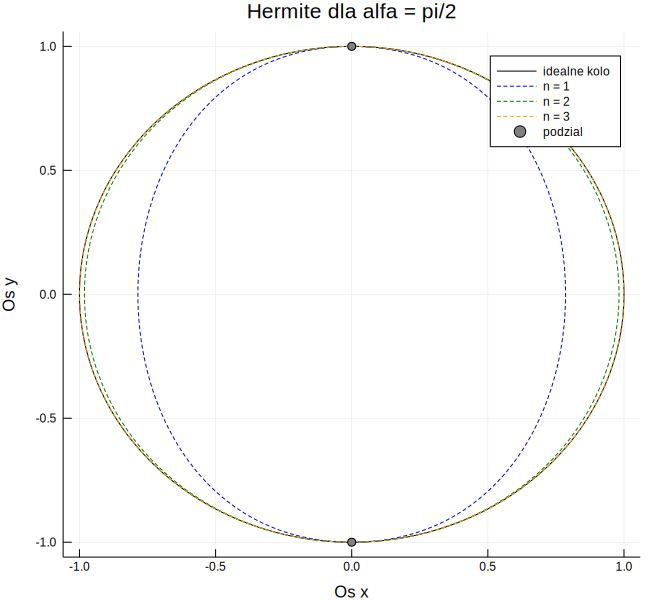

In [27]:
HPi2 = [circle(i, pi/2) for i in 1:5]

Plots.plot(size = (600*1.1, 600))

title!("Hermite dla alfa = pi/2")
xlabel!("Os x")
ylabel!("Os y")

plot!(idealne, lab = "idealne kolo", color = :black)
plot!(HPi2[1][2], lab = "n = 1", linestyle = :dash, color = :blue)
plot!(HPi2[2][2], lab = "n = 2", linestyle = :dash, color = :green)
plot!(HPi2[3][2], lab = "n = 3", linestyle = :dash, color = :orange)
# plot!(HPi2[4][2], lab = "n = 4", linestyle = :dash)
# plot!(HPi2[5][2], lab = "n = 5", linestyle = :dash)

scatter!(HPi2[2][3], lab = "podzial", color = :grey)

savefig("hermitedwa")
plot!()

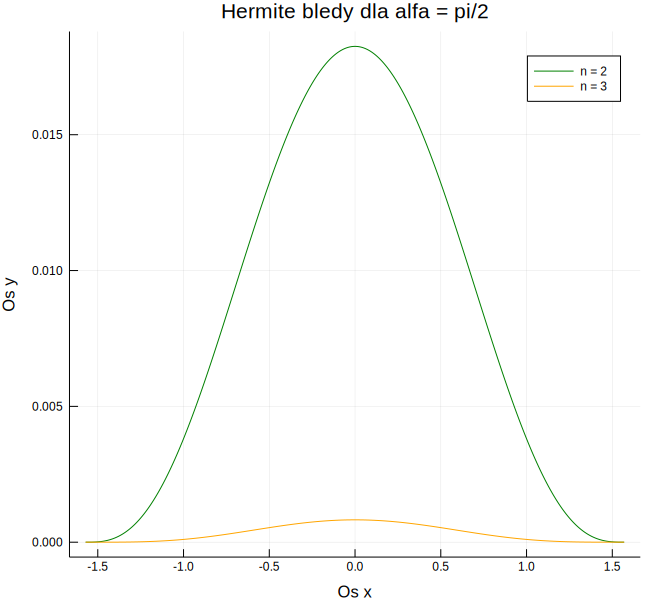

In [28]:
Plots.plot(size = (600*1.1, 600))

title!("Hermite bledy dla alfa = pi/2")
xlabel!("Os x")
ylabel!("Os y")

# plot!(HPi2[1][1], lab = "n = 1", color = :blue)
plot!(HPi2[2][1], lab = "n = 2", color = :green)
plot!(HPi2[3][1], lab = "n = 3", color = :orange)

savefig("hermitedwabledy")
plot!()

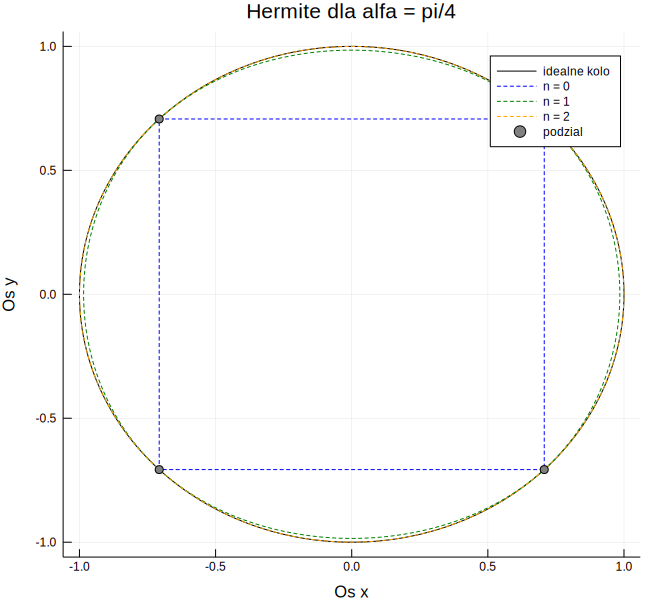

In [29]:
HPi4 = [circle(i, pi/4) for i in 0:5]
Plots.plot(size = (600*1.1, 600))

title!("Hermite dla alfa = pi/4")
xlabel!("Os x")
ylabel!("Os y")

plot!(idealne, lab = "idealne kolo", color = :black)
plot!(HPi4[1][2], lab = "n = 0", linestyle = :dash, color = :blue)
plot!(HPi4[2][2], lab = "n = 1", linestyle = :dash, color = :green)
plot!(HPi4[3][2], lab = "n = 2", linestyle = :dash, color = :orange)
# plot!(HPi4[4][2], lab = "n = 4", linestyle = :dash)
# plot!(HPi4[5][2], lab = "n = 5", linestyle = :dash)

scatter!(HPi4[1][3], lab = "podzial", color = :grey)

savefig("hermitetrzy")
plot!()

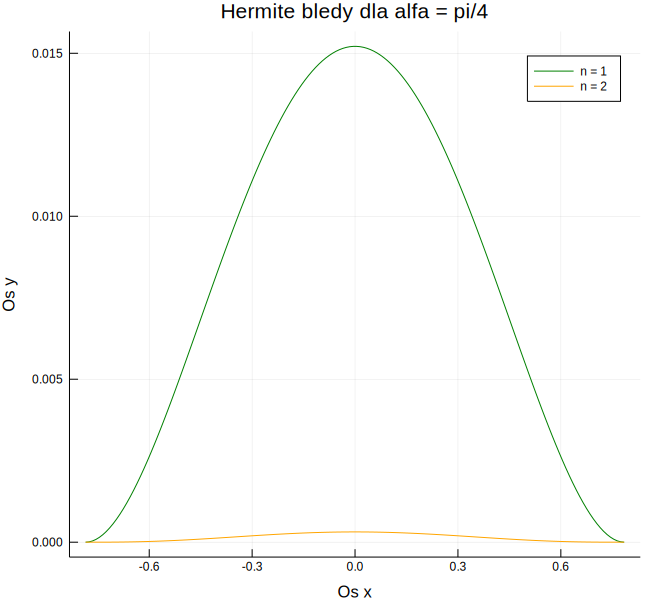

In [30]:
Plots.plot(size = (600*1.1, 600))

title!("Hermite bledy dla alfa = pi/4")
xlabel!("Os x")
ylabel!("Os y")

plot!(HPi4[2][1], lab = "n = 1", color = :green)
plot!(HPi4[3][1], lab = "n = 2", color = :orange)

savefig("hermitetrzybledy")
plot!()

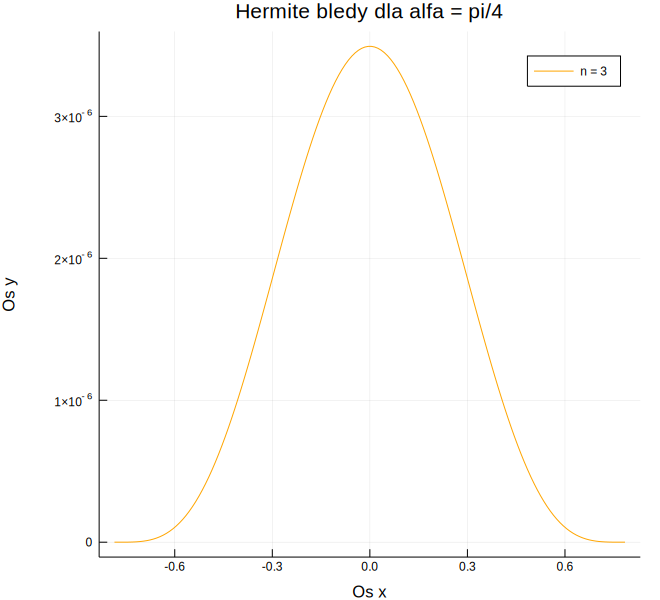

In [31]:
Plots.plot(size = (600*1.1, 600))

title!("Hermite bledy dla alfa = pi/4")
xlabel!("Os x")
ylabel!("Os y")

plot!(HPi4[4][1], lab = "n = 3", color = :orange)

# savefig("hermitetrzybledy")
plot!()

In [32]:
function helix(n, p, α = pi, r = 1)    
    Xks = [Xk(k, α) for k in 1:n]
    Yks = [Yk(k, α) for k in 1:n]
    
    angles = [t for t in -α:prec:α]
    
    xvalues = r * [Xn(t, n, α, Xks) for t in angles]
    yvalues = r * [Yn(t, n, α, Yks) for t in angles]
    zvalues = [p * t for t in angles]
    
    return [xvalues, yvalues, zvalues]
end

helix (generic function with 3 methods)

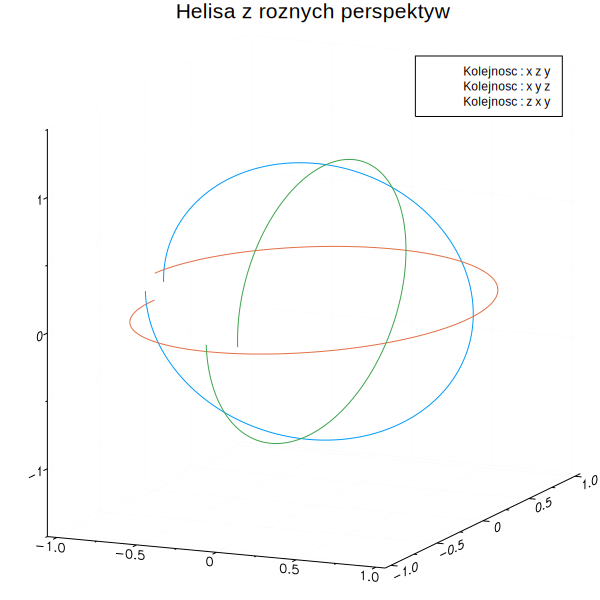

In [34]:
Plots.plot(size = (600, 600, 600))

x, y, z = helix(5, pi/100, pi)

title!("Helisa z roznych perspektyw")
plot!(x, z, y, lab = "Kolejnosc : x z y")
plot!(x, y, z, lab = "Kolejnosc : x y z")
plot!(z, x, y, lab = "Kolejnosc : z x y")

savefig("hermitehelisa")
plot!()